In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
plt.rcParams['figure.figsize'] = (10,10)
sns.set(rc={'figure.figsize' : (15,10)})
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

# 1. 데이터 불러오기 및 탐색

## 1-1. 데이터 불러오기

In [7]:
train = pd.read_csv(os.path.join('..', 'W04', 'train.csv'))
test = pd.read_csv(os.path.join('..', 'W04', 'test.csv'))

## 1-2. 데이터 preview

In [9]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [10]:
# feature 개수가 매우 많음
# float 8개, int 130개, object 5개
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [36]:
train['Id'].dtype == object

True

In [37]:
res = []
for c in train.columns:
    if train[c].dtype == object:
        v = 'object'
    elif train[c].dtype == int:
        v = 'int'
    elif train[c].dtype == float:
        v = 'float'
    else:
        pass
    res.append(v)

In [51]:
# meta 정보
meta = pd.DataFrame(res, columns = ['dtype'])
meta.index = train.columns
meta.head()

,dtype
Id,object
v2a1,float
hacdor,int
rooms,int
hacapo,int


In [16]:
train.describe(include = 'all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_bc58d8b5e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,NaN,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,NaN,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,NaN,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,NaN,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000


## 1-3. 데이터셋 결측치 확인하고 결측치 열 추출

In [83]:
train.select_dtypes(np.int64)['SQBage'].unique()

array([1849, 4489, 8464,  289, 1369, 1444,   64,   49,  900,  784,  121,
        324, 1156, 6241, 1521,  361, 4900, 2500,  484,  676, 4761, 4356,
       1681,  400, 1600, 1936, 3844, 1089, 1225, 3136, 2704, 1296,  225,
        576, 5776, 8836, 2025, 2304,  196, 1764,  169,  100, 5041,  841,
       3025,    1, 3600, 5476, 3249,  961, 7921, 3481,   16, 2116, 5625,
       6084, 2809, 3969, 2601,  441, 2209, 2401, 4624, 5329, 9409, 5184,
         36,   25, 3364,  729,    9,    4, 3721,   81,  625,  144,    0,
        529,  256, 2916, 1024, 4225, 5929, 6561, 7744, 4096, 7569, 6724,
       9025, 6400, 7225, 6889, 7056, 8100, 7396, 8281, 8649])

In [55]:
# 아래 3개 feature의 Null 비율이 매우 높음 -> 삭제
train.isnull().sum().sort_values()

Id                0
edjefa            0
edjefe            0
dependency        0
hogar_total       0
               ... 
SQBmeaned         5
meaneduc          5
v2a1           6860
v18q1          7342
rez_esc        7928
Length: 143, dtype: int64

## 1-4. 결측치 처리하기

In [58]:
train = train.drop(['v2a1', 'v18q1', 'rez_esc'], axis = 1)
test = test.drop(['v2a1', 'v18q1', 'rez_esc'], axis = 1)

# 2. 데이터 시각화

## 2-1. integer column의 고유값에 대한 막대그래프 그리기

## 2-2. float column의 target별 kdeplot 그리기

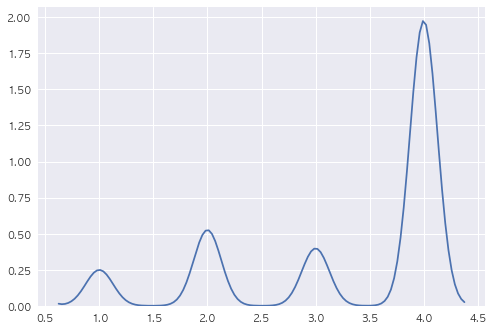

In [69]:
sns.kdeplot(train.Target.values)